In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os as os
import scipy.stats as st

%matplotlib inline

ks_data = pd.read_csv('../data/ks_projects_201801.csv')

ks_data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [33]:
ks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [34]:
ks_data.tail()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.0
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.0
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.0
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.0
378660,999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16,2000.0,2011-07-19 09:07:47,524.0,failed,17,US,524.0,524.0,2000.0


## Description ##

This dataset is a CSV from Kaggle that includes a snapshot from January 2018 of all Kickstarter projects on the Kickstarter platform. Kickstarter is one of the most well known crowdfunding sites. In particular, this dataset includes the below important fields for analysis:
* ID - The unique ID of the kickstarter project
* Name - The name of the project
* Category - What specific category the project is in (i.e. "Performance Art") 
* Main Category - The overarching category of the previous "Category" column (i.e. "Art")
* Currency - The currency of the fund
* Deadline - The deadline of the fundraising goal
* Goal - The goal of the fund
* Launched - The date it launched
* Pledged - The amount pledged against the fund
* Backers - How many backers a fund had
* Country - The country of the project
* usd_pledged - The amount pledged in USD based on Kickstarters conversion
* usd_pledged_real & usd_goal_real - The amount pledged and goal based on a separate conversion method

There appears to be no null values or any data quality issues to control for as all the values are categorized correctly regarding their data type




In [59]:
# The describe method gives us some summary statistics below

ks_data.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


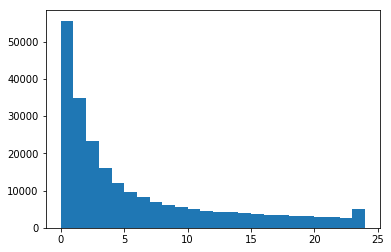

In [66]:
# Looking at a histogram, we can see while the average of backers is 105, 
#the actual data is skewed left, and the median is only 12 backers

plt.hist(ks_data.backers, bins=range(0, 101))
plt.show()


backers skew is: 86.76266531219838
backers skew is: 75.15149380072741
backers skew is: 82.18719048424745


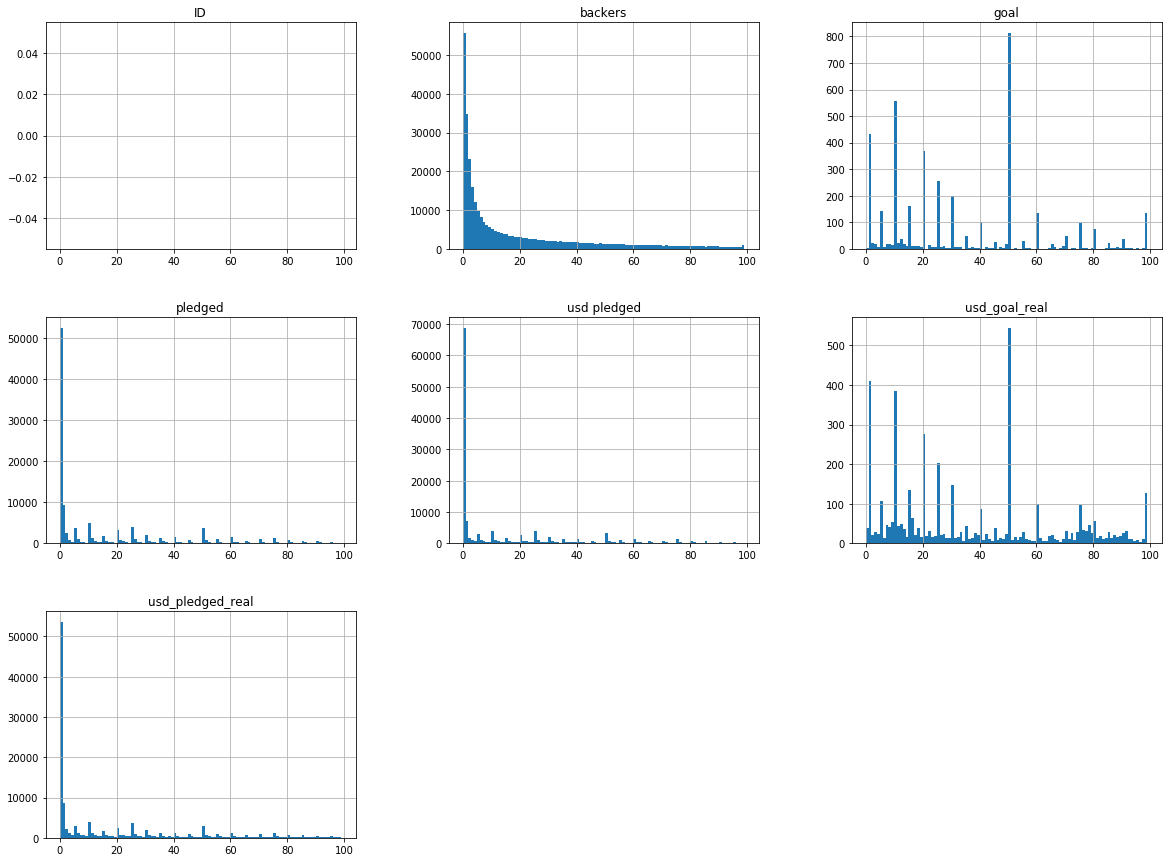

In [78]:
ks_data.hist(bins=range(0,100), figsize=(20,15));

# There's no real order to the data, it seems mostlly skewed with backers, pledged and USD pledged being right skewed.

print("backers skew is: " + str(st.skew(ks_data["backers"])))
print("backers skew is: " + str(st.skew(ks_data["pledged"])))
print("backers skew is: " + str(st.skew(ks_data["usd_pledged_real"])))

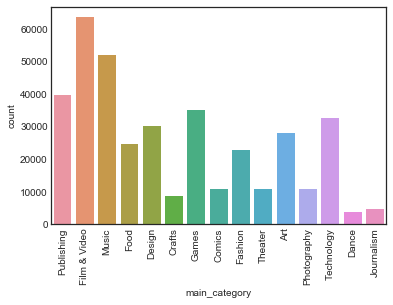

In [85]:
# This sets the Seaborn style
sns.set_style("white")
sns.despine()

#This does a countplot of the main category variable
cat_countplot = sns.countplot(x="main_category", data=ks_data)

cat_countplot_final = plt.xticks(rotation=90)


## Results ##

As we can see from the results:
* Film & Video seem to be the top category
* Music is the second top category
* Publishing is third, with games and technology coming in fourth and fifth, respectively

In [92]:
ks_category_table = ks_data.groupby(['category',"main_category"])['ID'].nunique()

ks_category_table.sort_values(ascending=False).head(10)

category        main_category
Product Design  Design           22314
Documentary     Film & Video     16139
Music           Music            15727
Tabletop Games  Games            14180
Shorts          Film & Video     12357
Video Games     Games            11830
Food            Food             11493
Film & Video    Film & Video     10108
Fiction         Publishing        9169
Fashion         Fashion           8554
Name: ID, dtype: int64

## Results ## 

From this basic table, we can infer:
* The top number of products on kickstarter tend to fall into the Product Design / Design category with over 22,000 unique projects
* Documentaries under Film & Video are next
* Music comes in third

In [94]:
ks_status_table = ks_data.groupby(['state'])['ID'].nunique()

ks_status_table.sort_values(ascending=False)

state
failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: ID, dtype: int64

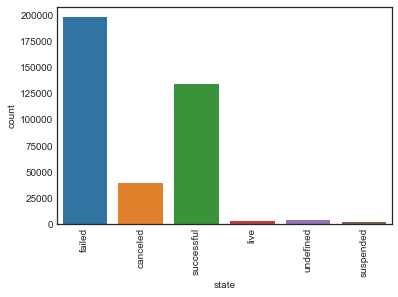

In [100]:
# This sets the Seaborn style
sns.set_style("white")
sns.despine()

#This does a countplot of the main category variable
cat_countplot = sns.countplot(x="state", data=ks_data)

cat_countplot_final = plt.xticks(rotation=90)


## Results ##

* As we can see, the majority of kickstarter projects fail (~52% or 197719 / 378661)
* 35% are successful (133956 / 378661)
* 10% are canceled (38779 / 378661)

Further analysis I would like to explore:
* What predicts a successful kickstarter project?
* Does one particular medium (i.e. Documentary) get funded more than others?

We could look at this by using a linear regression model to see what factors are predictive of a funding state of "successful"